In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# LightAutoML потому что зачем стараться если можно не стараться
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco, ReportDecoUtilized
from lightautoml.addons.tabular_interpretation import SSWARM

'nlp' extra dependency package 'gensim' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'gensim' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.


c:\Users\U53R\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\U53R\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightautoml\ml_algo\dl_model.py:42: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
c:\Users\U53R\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightautoml\text\embed.py:22: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
c:\Users\U53R\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightautoml\text\dl_transformers.py:25: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")


In [2]:
N_THREADS = 12
N_FOLDS = 5
RANDOM_STATE = 33
TIMEOUT = 10800
TARGET_NAME = 'target'

In [6]:
#а вот датасет я вам не покажу, по рукам надоют
train_set_raw = pd.read_json("./data/train_set_3p.json")
test_set = pd.read_json("./data/test_set_3p.json")

In [7]:
#Возьмем не все данные а только самые свежие
some_point = train_set_raw['dt'].quantile(0.75)
train_set = train_set_raw.query('dt > @some_point')

In [8]:
# см - преобразования таргета в дизайн доке
task = Task('reg', loss='mae', metric='mae')
roles = {
    'target': TARGET_NAME,
    'category': ['lvl_1', 'lvl_2', 'lvl_3', 'lvl_4', 'lvl_5'],
    'drop': ['msku', 'dt']
}

In [9]:
#Сэкономлю всем время, LGBM всегда лучше катбуста
RD = ReportDeco(output_path = '/home/george-bekh/Downloads/tabularAutoML_model_report')

automl_rd = RD(
    TabularAutoML(
        task = task, 
        timeout = TIMEOUT,
        cpu_limit = N_THREADS,
        general_params = {'use_algos': [['lgb_tuned']]},
        reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
        tuning_params={'max_tuning_time':600}
    )
)

In [10]:
out_of_fold_predictions = automl_rd.fit_predict(train_set, roles = roles, verbose = 2)

[15:16:31] Stdout logging level is INFO2.
[15:16:31] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[15:16:31] Task: reg

[15:16:31] Start automl preset with listed constraints:
[15:16:31] - time: 10800.00 seconds
[15:16:31] - CPU: 12 cores
[15:16:31] - memory: 16 GB

[15:16:31] Train data shape: (505271, 50)

[15:16:46] Layer 1 train process start. Time left 10784.88 secs
[15:17:22] Selector_LightGBM fitting and predicting completed
[15:17:39] Start hyperparameters optimization for Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM ... Time budget is 600.00 secs


Optimization Progress:  16%|█▌        | 16/101 [10:21<55:00, 38.83s/it, best_trial=12, best_value=-0.312]  

[15:28:00] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM completed
[15:28:00] The set of hyperparameters {'feature_fraction': 0.8681448411699153, 'num_leaves': 254, 'bagging_fraction': 0.5108774732829887, 'min_sum_hessian_in_leaf': 0.018211374340960085, 'reg_alpha': 1.515658819023452e-08, 'reg_lambda': 8.98266814056212e-06}
 achieve -0.3122 mae
[15:28:00] Start fitting Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM ...
[15:28:00] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM =====


[15:29:08] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM =====
[15:30:16] ===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM =====
[15:30:58] ===== Start working with fold 3 for Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM =====
[15:32:07] ===== Start working with fold 4 for Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM =====
[15:33:16] Fitting Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM finished. score = -0.29254847241364496
[15:33:16] Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM fitting and predicting completed
[15:33:16] Time left 9795.19 secs

[15:33:16] Layer 1 training completed.

[15:33:16] Automl preset training completed in 1004.86 seconds

[15:33:16] Model description:
Final prediction for new objects (level 0) = 
	 1.00000 * (5 averaged models Lvl_0_Pipe_0_Mod_0_Tuned_LightGBM) 



In [11]:
preds_train = automl_rd.model.predict(train_set)

In [12]:
preds_test = automl_rd.model.predict(test_set)

In [13]:
preds = preds_test.data[:,0]
true = test_set['target'].values
counts = test_set['counts_sum'].values

In [20]:
WAPE = np.sum(np.abs((preds + 1) * counts - (true + 1) * counts)) / np.sum((true + 1) * counts)
MAPE = np.mean(np.abs(preds - true))
inaccuracy = np.sum(((preds - true) * counts)[preds - true > 0]) / np.sum((preds + 1) * counts)
bias = np.mean(preds - true)

# пояснение - таргет у меня преобразован так что он теперь представляет разницу в процентных пунктах
# а значит предсказать прошлым месяцем = предскзать 0
preds_base = np.zeros_like(true)

WAPE_base = np.sum(np.abs((preds_base + 1) * counts - (true + 1) * counts)) / np.sum((true + 1) * counts)
MAPE_base = np.mean(np.abs(preds_base - true))
inaccuracy_base = np.sum(((preds_base - true) * counts)[preds_base - true > 0]) / np.sum((preds_base + 1) * counts)
bias_base = np.mean(preds_base - true)

In [21]:
print(f"""
WAPE: {WAPE}
bias: {bias}
inaccuracy: {inaccuracy}
MAPE: {MAPE}
""")


WAPE: 0.329733084937275
bias: -0.05703999674883592
inaccuracy: 0.1496769580545355
MAPE: 0.38186642952891425



In [22]:
print(f"""
WAPE_base: {WAPE_base}
bias_base: {bias_base}
inaccuracy_base: {inaccuracy_base}
MAPE_base: {MAPE_base}
""")


WAPE_base: 0.4318396525728863
bias_base: -0.09208315086661628
inaccuracy_base: 0.22103852901199206
MAPE_base: 0.48400317717828806



<Axes: xlabel='Feature'>

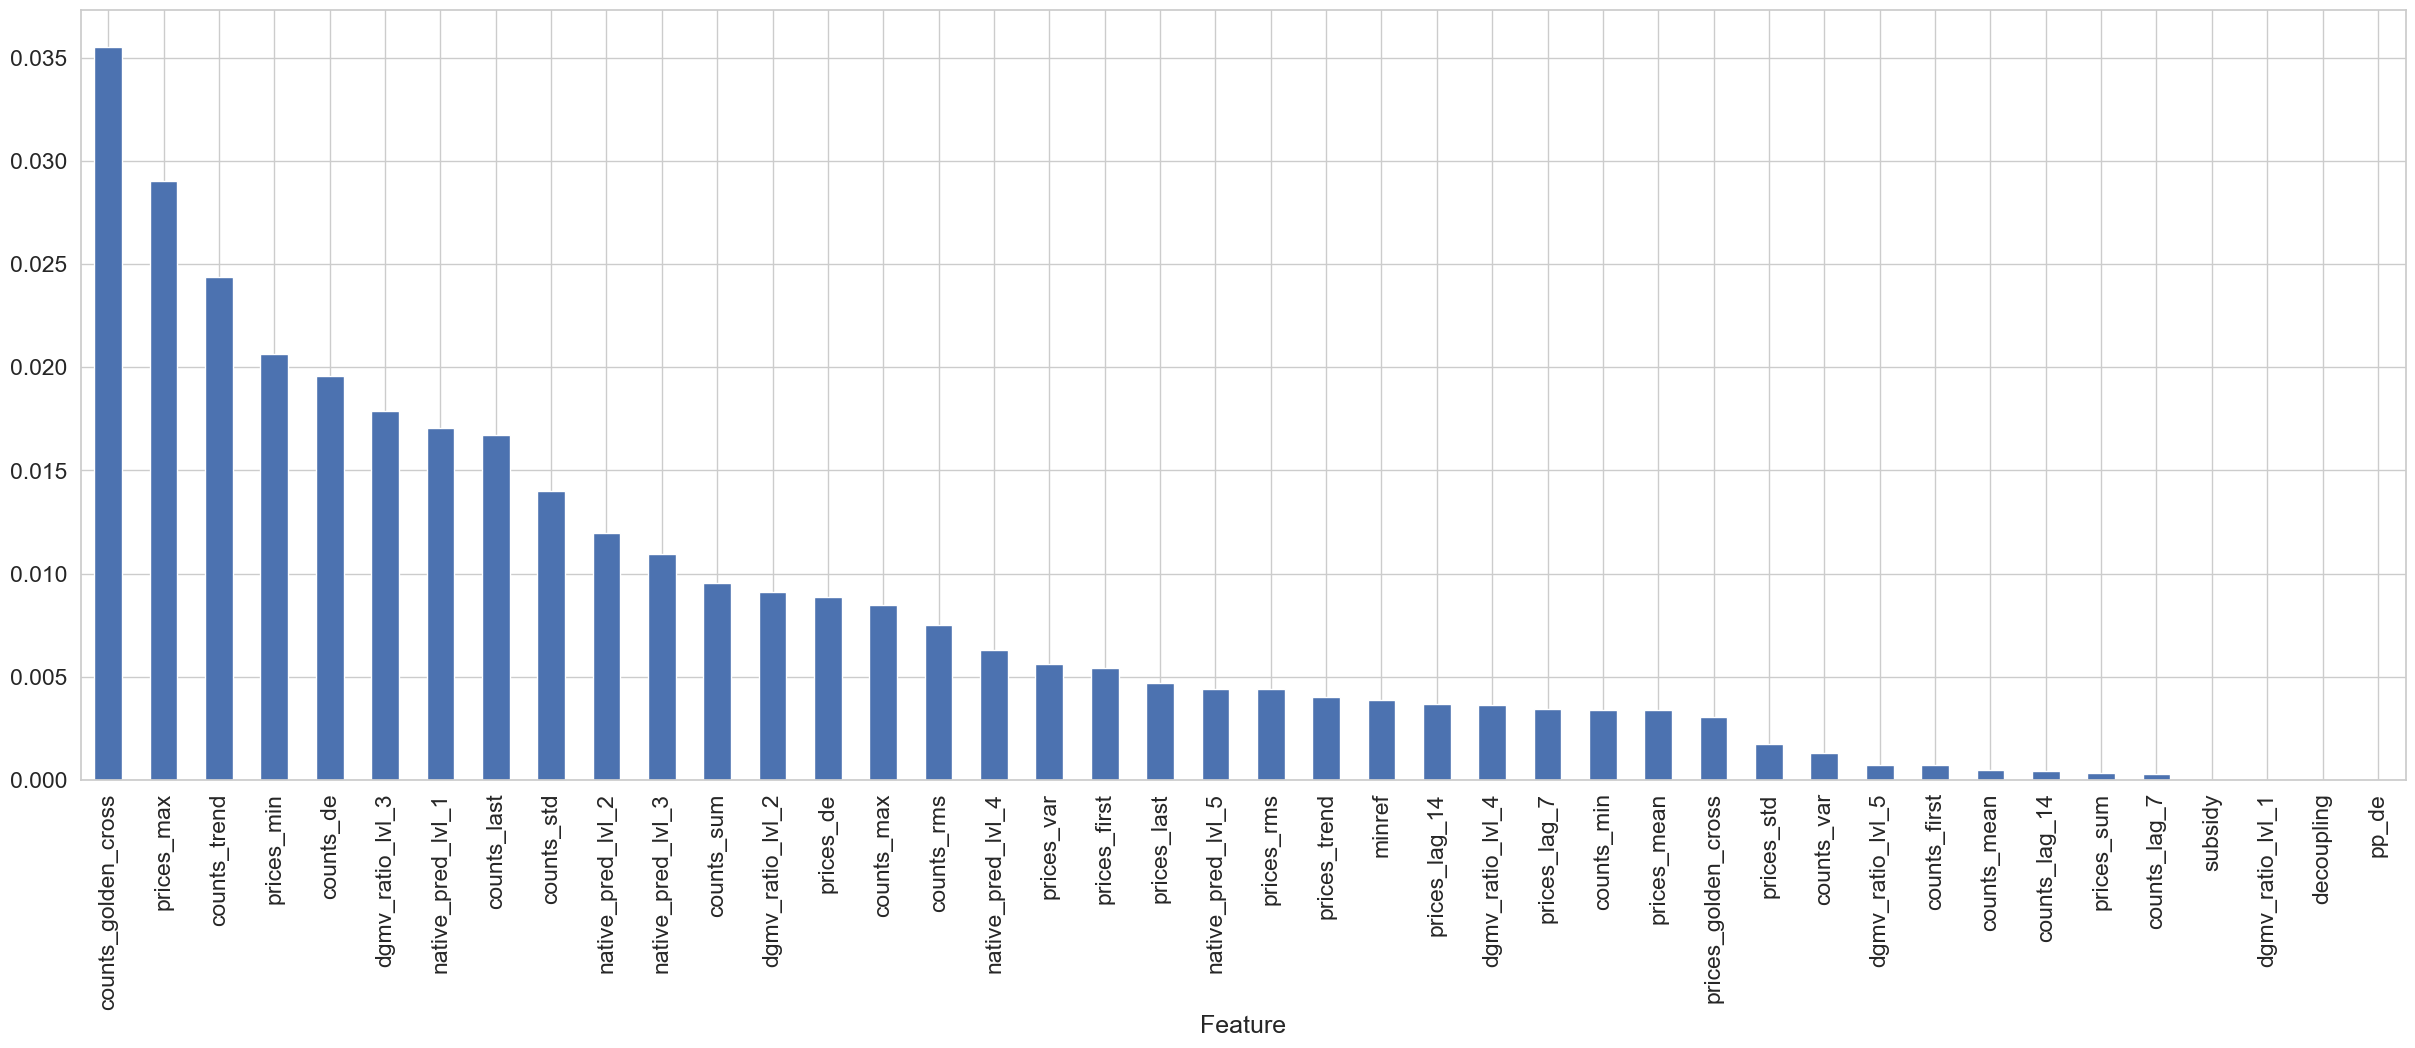

In [16]:
#теханализ + физика рулят
accurate_fi = automl_rd.model.get_feature_scores('accurate', test_set)
accurate_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

Легко видеть что эластичность и субсидии вообще неоправдывают затраченных на них усилий, связанно это с тем что они лаговые (то есть они в прошлом) а надо в будущем, какая разница что была скидка на жевачку месяц назад, если мы сейчас продаем? А вот теханализ очень порадовал, принес MAPE порядка 5 проц пункта